# Определение закономерностей, влияющих на успешность игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Оглавление
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)  
    1.1 [Вывод к Шагу 1](#step1.1)
    
        
2. [Шаг 2. Подготовка данных](#step2)  
    2.1  [Обработка пропущенных значений](#step2.1)    
    2.2  [Замена типов данных](#step2.2)  
    2.3  [Подсчёт суммарных продаж](#step2.3)  
    2.4  [Вывод к Шагу 2](#step2.4)     
  
    
3. [Шаг 3. Проведение исследовательского анализа данных](#step3)   
    3.1   [Cколько игр выпускалось в разные годы](#step3.1)  
    3.2   [Как менялись продажи по платформам](#step3.2)  
    3.3   [Определяем актуальный период](#step3.3)  
    3.4   [Ящик с усами для топ-10 платформ](#step3.4)  
    3.5   [Влияние отзывов на продажи](#step3.5)   
    3.6   [Распределение игр по жанрам](#step3.6)   



4. [Шаг 4. Составление портрета пользователя каждого региона](#step4)  
    4.1   [Самые популярные платформы (топ-5) для каждого региона](#step4.1)  
    4.2   [Самые популярные жанры (топ-5) для каждого региона](#step4.2)  
    4.3   [Влияние рейтинга ESRB на продажи в каждом регионе](#step4.3)   

    
5. [Шаг 5. Проверка гипотез](#step5)  
    5.1   [Первая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#step5.1)  
    5.2   [Вывод к первой гипотезе](#step5.2)  
    5.3   [Вторая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#step5.3)  
    5.4   [Вывод ко второй гипотезе](#step5.4)   

    
6. [Шаг 5. Общий вывод](#step6)  

### Шаг 1. Откройте файлы с данными и изучите общую информацию <a id="step1"></a>   
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
from math import factorial
import numpy as np
from functools import reduce
import seaborn as sns

data = pd.read_csv('/datasets/games.csv')
display(data)

data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод<a id="step1.1"></a>   
</div>  

В датасете есть 16715 записей.
Самые большое количество пропусков видно в оценках критиков и пользователей (`critic_score` и `user_score` соответственно), а также в общем рейтинге `rating` игры от ESRB.  

Меньшее количество пропущенных значений есть в столбце с годом выпуска `year_of_release`.
  
Несколько значений пропущено в `name` и `genre`.

У `user_score` нужно изменить тип данных на `float64`. Это пригодится нам в дальнейшем при анализе данных.   

Для оптимизации памяти изменим тип данных у столбца `year_of_release` на `object`. 


### Шаг 2. Предобработка данных <a id="step2"></a>   
</div>  

Приведём названия столбцов к нижнему регистру

In [2]:
data.columns = data.columns.str.lower()

# Проверим названия наших столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропущенных значений <a id="step2.1"></a>   
</div>  

Посмотрим количество пропущенных значений и количество дубликатов

In [3]:
display(data.isnull().sum())
print('Количество дубликатов в датасете:', data.duplicated().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Количество дубликатов в датасете: 0


Посмотрим на строки с пропущенными значениями в годе выпуска

In [4]:
display(data.loc[data['year_of_release'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как видно из таблицы выше адекватно заполнить пропущенный год выпуска не представляется возможным. Да, есть ряд игр, где указан год (особенно это актуально для спортивных игр), но год в названии игры не означает дату выхода этой игры. К примеру, EA Sports выпускает серии игр FIFA, NHL и т.д. на полгода раньше фактического календарного года, то есть FIFA20 вышла в октябре 2019.  

Но, чтобы совсем не удалять эти значения (хоть они и составляют не самый большой процент от общего числа в датасете), подставим им 1900 год. На гистограммах это будет ясно видно, а для исследований, где не нужен будет год исследования, другие значения в этих строках могут пригодиться. 

In [5]:
data['year_of_release'].fillna(1900, inplace=True)

На всякий случай построим гистрограмму для года выпуска игры, чтобы исключить возможность иных выбросов

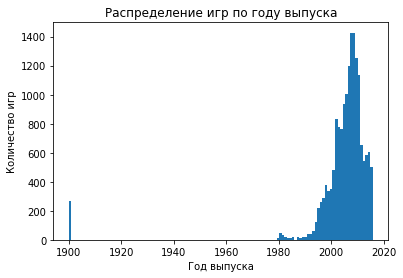

In [6]:
plt.hist(data['year_of_release'], bins = 120)
plt.title('Распределение игр по году выпуска')             
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')  
plt.show()

Всё выглядит логично, наш искусственный маркер на гистограмме также видно. 

Теперь изучим данные в оценке критиков и пользователей. Отдельно обратим внимание на tbd. *TBD (To Be Determined)* - то есть рейтинг будет определён, возможно это связано с тем, что эти игры ещё не вышли.

Выведем таблицу с tbd в `user_score`


In [7]:
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,1900.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


И посмотрим на таблицу пропущенных значений

In [8]:
data.loc[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как мы видим и там, и там не прослеживается какая-то зависимость между столбцами датасета. Поэтому промаркируем эти значения отрицательным значениям, так как в дальнейшим будем приводить этот столбец к числовому формату, а просто избавиться от этих строк мы не имеем права, так как они составляют весомую часть датасета.

К слову для столбцов `critic_score` ситуация абсолютно аналогична, поэтому их также промаркируем на отрицательное значение.

In [9]:
data.loc[(data['user_score'] == 'tbd') | (data['user_score'].isna()), 'user_score'] = -1
data.loc[data['critic_score'].isna(), 'critic_score'] = -1


Теперь изучим столбец `rating`

In [10]:
display(data.loc[(data['rating'] == 'tbd') | (data['rating'].isna())].head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,-1.0,-1,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,-1.0,-1,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,-1.0,-1,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,-1.0,-1,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,-1.0,-1,NaN


Так рейтинг от организации ESRB имеет буквенную запись, то пропущенные значения в нём заменим на 'ND' (no data).

In [11]:
data.loc[data['rating'].isna(), 'rating'] = 'ND'

Посмотрим уникальные значения для столбцов '`platform`, `genre` и `rating`

In [12]:
display(data[['platform','genre', 'rating']].apply(lambda x: x.value_counts()).T.stack())

platform  2600             133.0
          3DO                3.0
          3DS              520.0
          DC                52.0
          DS              2151.0
          GB                98.0
          GBA              822.0
          GC               556.0
          GEN               29.0
          GG                 1.0
          N64              319.0
          NES               98.0
          NG                12.0
          PC               974.0
          PCFX               1.0
          PS              1197.0
          PS2             2161.0
          PS3             1331.0
          PS4              392.0
          PSP             1209.0
          PSV              430.0
          SAT              173.0
          SCD                6.0
          SNES             239.0
          TG16               2.0
          WS                 6.0
          Wii             1320.0
          WiiU             147.0
          X360            1262.0
          XB               824.0
          

В столбцах `platform` есть много родственных платформ, к примеру несколько поколений одной и той же платформы playstation (1,2,3,4,portable).  
К `genre` замечаний нет, кроме двух пропущенных значений.  
В `rating` есть много значений, среди которых есть старое и новое обозначение одного и того же типа. **E** (Everyone) - это современное обозначение для **K-A** (Kids to Adults) и **EC** (Early Childhood). Хотя у **K-A** всего 3 значения, а у **EC** - 8, всё равно актуализуруем строки с этим рейтингом c помощью метода replace.  
Хоть **AO**(Adults Only) и всего 1, но подтягивать его к **M** (Mature) не будем. Всё-таки оба обозначения действующие, а там мало ли чего :)   
Наше **ND** можно объединить с **RP** (Rating Pending), так как по смыслу это одно и тоже. Предварительно посмотрим только, не относятся ли в датасете **RP** к играм, которые только будут выходить.

Посмотрим на пропущенные значения в столбце `genre`

In [13]:
display(data.loc[data['genre'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1,ND
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1,ND


Как видно, в этих двух строках пропущено множество значений, поэтому просто удалим их, так как сколь либо существенного влияния на наше исследование они не окажут. Кстати, это автоматически решит вопрос и с пропущенными значениями в столбце `name`

In [14]:
data.dropna(subset=['genre'], inplace=True)

Разберёмся с **K-A** и **EC** в `rating`

In [15]:
data['rating'] = data['rating'].replace(['K-A', 'EC'], 'E')

Посмотрим строки с **RP**

In [16]:
display(data.loc[data['rating'] == 'RP'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,1900.0,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,1900.0,Racing,0.0,0.01,0.0,0.00,65.0,-1,RP


Нет, привязанности к году (или чему-либо ещё нет), поэтому смело меняем наше **ND** на **RP**.

In [17]:
data['rating'] = data['rating'].replace(['ND'], 'RP')

data['rating'].value_counts()

RP      6767
E       4001
T       2961
M       1563
E10+    1420
AO         1
Name: rating, dtype: int64

Теперь в рейтинге ESRB порядок, идём дальше! Посмотрим, остались ли необработанные пропущенные значения.

In [18]:
display(data.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Всё хорошо, тогда поменяем заменим тип данных как и обещали

### Замена типа данных <a id="step2.2"></a>   
</div>  

Заменим тип данных у года выпуска на `int`, а рейтинг пользователей на `float64`. Применим методы astype и to_numeric библиотеки pandas соответственно

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'])

# Проверим, что всё получилось и выведем первые десять строчек датасета.
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,RP
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,RP


### Подсчёт суммарных продаж <a id="step2.3"></a>   
</div>  

В завершении шага подсчитаем суммарные продажи, сложив продажи по каждому региону.

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,30.38


Теперь всё готово для дальнейшего анализа нашего датасета.

### Вывод <a id="step2.4"></a>   
</div>  

В целом, изначально мы получили датасет с рядом возможностей для улучшения. Есть ряд пропущенных значений в важных для нас столбцах рейтингов. Видимо основным критерием при создании датасета было наличие продаж для каждого региона. С этим и правда нет проблем.

Что касается пропущенных значений, то отсутствующий год выпуска мы промаркировали 1900 годом, в столбцах рейтинга критиков и пользователей использовали отрицательные значения, для рейтинга ESRB логически путем пришли к тому, что можем заполнить пропущенные значения по их же классификации значением **RP** (Rating Pending).  

В рейтинге ESRB также актуализировали данные, так как часть их идентификации уже потеряла актуальность.  

Причинами пропущенных значений в рейтинге ESRB можно назвать:
1. Человеческий фактор (просто не заполнили/не успели заполнить);
2. Год выпуска игры, так как сама организация ESRB создана в 1994, то можно предположить, что далеко не все игры старше они оценивали (можно и сказать про банальную лень).

Удалять пропущенные значения в оценках критиков и пользователей нельзя, так как это удалит около 50% строк датасета.
Возможной причиной пропусков можно назвать недостаточное количество оценок (т.е. действует какой-то минимальный порог голосов, после которого рейтинг формируется) или вновь человеческий фактор.

Также на данном этапе мы заменили тип данных для года выпуска на целочисленный, а для рейтинга пользователей сделали вещественный тип. 

В завершении этапа мы добавили суммарные продажи, что пригодится нам в дальнейшем исследовании.

В целом, датасет готов к дальнешей аналитике.


### Шаг 3. Проведение исследовательского анализа данных <a id="step3"></a>   
</div>  

### Cколько игр выпускалось в разные годы <a id="step3.1"></a>   
</div>  

Для начала построим сколько игр выпускалось в каждый год

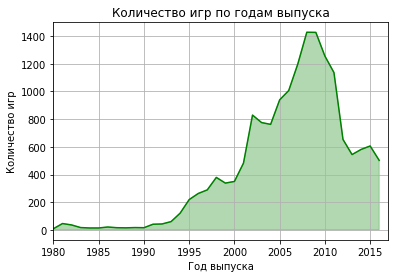

In [21]:
games_by_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
games_by_years.columns = ['count']

plt.plot(games_by_years.index, games_by_years['count'], c = "g")
plt.xlim(1980,2017)
plt.title('Количество игр по годам выпуска') 
plt.fill_between(games_by_years.index, games_by_years['count'], where = games_by_years['count']>=0, color="g", alpha = 0.3)
plt.grid()
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')  
plt.show()


Как видно из графика, принципиальный скачок виден около 1994 года, до этого количество игр не такое большое, поэтому период до 1994 года для анализа нам не так интересен. 

### Как менялись продажи по платформам <a id="step3.2"></a>   
</div>  

Теперь построим сводную таблицу продаж для каждой платформы по годам

In [22]:
platform_sales_by_year = data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', aggfunc='sum') 

#В сводной таблице получилось очень много пропущенных значений, заменим их на нули
platform_sales_by_year.fillna(0, inplace=True)

Выведем десять последних лет получившейся таблицы

In [23]:
display(platform_sales_by_year.tail(10))

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2007,0.0,0.0,0.00,0.02,135.85,0.0,3.35,0.27,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,139.22,0.00,86.68,0.53,0.00
2008,0.0,0.0,0.00,0.04,134.37,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,156.33,0.00,122.56,0.17,0.00
2009,0.0,0.0,0.00,0.00,110.99,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,189.43,0.00,109.26,0.00,0.00
2010,0.0,0.0,0.00,0.00,79.48,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.73,0.00,155.80,0.00,0.00
2011,0.0,0.0,58.80,0.00,24.30,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.37,0.00,131.11,0.00,0.00
2012,0.0,0.0,48.77,0.00,10.42,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.22,16.30,91.45,0.00,0.00
2013,0.0,0.0,53.97,0.00,1.42,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.87,20.12,80.82,0.00,17.21
2014,0.0,0.0,41.75,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.45,20.35,31.61,0.00,49.26
2015,0.0,0.0,26.75,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.05,15.22,10.86,0.00,54.67


Посчитаем количество ненулевых годов, что в дальнейшем поможет нам найти **актуальный период**

       active_period_years
count            31.000000
mean              8.193548
std               5.412451
min               1.000000
25%               4.000000
50%               8.000000
75%              12.000000
max              27.000000


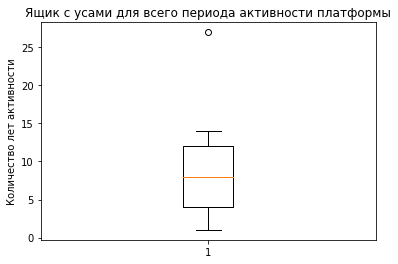

In [24]:
active_period = []
#platform_sales_by_year = platform_sales_by_year.drop(['PS4', 3DS','XOne'], 1)
for platform in platform_sales_by_year.columns:
    
    active_period.append(platform_sales_by_year[platform].ne(0).value_counts().loc[platform_sales_by_year[platform].ne(0).value_counts().index == True].values[0])

# И создадим dataframe
active_period = pd.DataFrame(active_period, columns=['active_period_years'])

# Применим метод describe к созданному dataframe

print(active_period.describe())

# Для наглядности построим ящик с "усами"
plt.boxplot(active_period['active_period_years'])
plt.title('Ящик с усами для всего периода активности платформы')
plt.ylabel('Количество лет активности')
plt.show()

Из получившегося ящика можно сделать вывод, что **средний срок жизни** для платформы составляет около 8 лет, что подтверждают кейсы PS4 и Xbox. Выпуск нового поколения начинается через через 6-9 лет, то есть предыдущая версия теряет свою *актуальность*.

Найдём 10 платформ с наибольшими суммарными продажами

In [25]:
top10_sales =  data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top10_sales = top10_sales.sort_values(by = 'total_sales', ascending = False).head(10)
top5_sales = top10_sales.sort_values(by = 'total_sales', ascending = False).head(5)
display(top10_sales)

,total_sales
platform,
PS2,1062.33
X360,885.66
Wii,828.44
PS3,803.97
DS,746.86
PS,689.95
GBA,310.12
PS4,265.79
PSP,252.63


### Опеределяем актуальный период <a id="step3.3"></a>   
</div>  

Посмотрим на продажи топ-10 платформ, предварительно избавившись от данных до 1994 года

In [26]:

for platform in platform_sales_by_year.columns:
    if platform not in top10_sales.index:
        platform_sales_by_year.drop(platform, axis=1, inplace=True)
platform_sales_by_year = platform_sales_by_year[platform_sales_by_year.index >= 1994]
platform_sales_by_year

platform,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,
1994,0.00,0.00,5.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,89.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,128.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,160.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,136.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.07,91.09,35.59,0.00,0.00,0.00,0.00,0.00,0.95
2001,0.00,59.62,33.42,149.65,0.00,0.00,0.00,0.00,0.00,21.63
2002,0.00,72.35,6.31,183.66,0.00,0.00,0.00,0.00,0.00,46.32


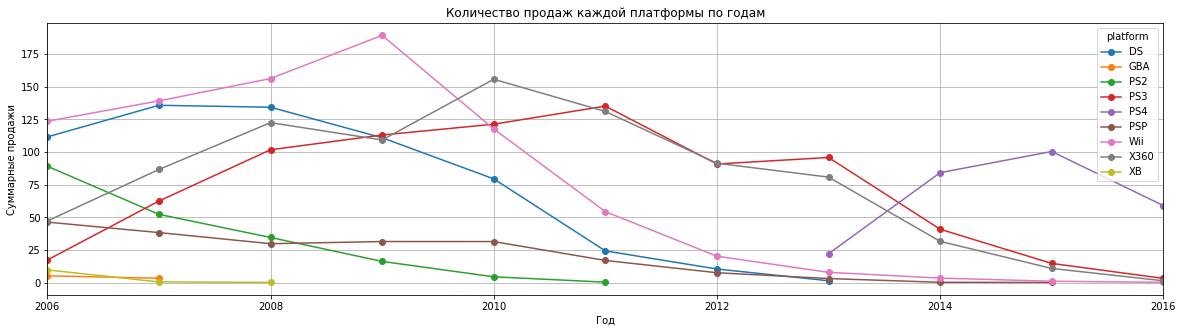

In [27]:
fig, ax = plt.subplots(figsize = (20,5))
top_platforms = top10_sales.index
actual_data = data.query('year_of_release > 2005')
pd.pivot_table(actual_data.query('platform.isin(@top_platforms)'),
                index = 'year_of_release',
                columns = 'platform',
                values = 'total_sales',
                aggfunc = 'sum').plot(ax = ax, style = 'o-', grid = True)

plt.title('Количество продаж каждой платформы по годам')
plt.ylabel('Суммарные продажи')

plt.xlabel('Год')
plt.plot()
plt.show()


На основе таблицы и графика можно сделать следующие выводы:
1. В пике актуального периода находится PS4.
2. PS3, Wii и X360 наоборот снижаются по продажам. 
3. **Актуальный период** PS4, начался с 2013 года, то есть в дальнейшем будет рассматривать период с 2013-2016 года. 

### Ящик с усами для топ-10 платформ <a id="step3.4"></a>   
</div>  

Для всех топовых платформ построим "ящик с усами".

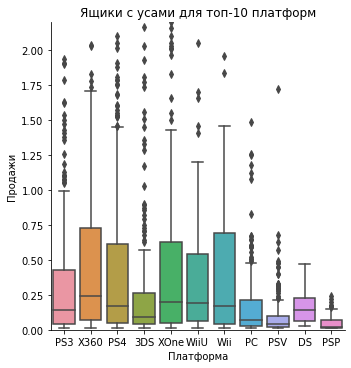

In [28]:
actual_data = data.query('year_of_release >= 2013')

sns.catplot(x="platform", y='total_sales', kind="box", data=actual_data)
plt.ylim(0,2.2)
plt.title('Ящики с усами для топ-10 платформ')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

Построим и выведем сводную таблицу глобальных продаж для выбранных платформ. 

In [29]:
display(actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False))

,total_sales
platform,
PS4,265.79
PS3,154.66
XOne,145.05
3DS,136.97
X360,124.69
WiiU,59.94
PC,36.47
PSV,29.73
Wii,12.54


Построенные графики и сводная таблица подтверждают, что в актуальном периоде лидером является PS4. За ним с отрывом идут PS3, XOne, 3DS и X360.

Разница между платформами напрямую связана с их форматом (портативная/настольная) и датой выпуска. Однозначно видно снижение продаж у портативных консолей, их заменяют смартфонами.   

### Влияние отзывов на продажи <a id="step3.5"></a>   
</div>  

Теперь изучим влияние отзывов пользователей и критиков на продажи на продажи на примере PS4. Предварительно возьмём из датасета только строчки с существующими данными. 

In [30]:
ps4 = actual_data.query('platform == "PS4" and (user_score != -1) and (critic_score != -1)')

Посмотрим на корреляцию между продажами, рейтингом пользователей и критиков.

,critic_score,total_sales,user_score
critic_score,1.000000,0.405223,0.557654
total_sales,0.405223,1.000000,-0.032923
user_score,0.557654,-0.032923,1.000000


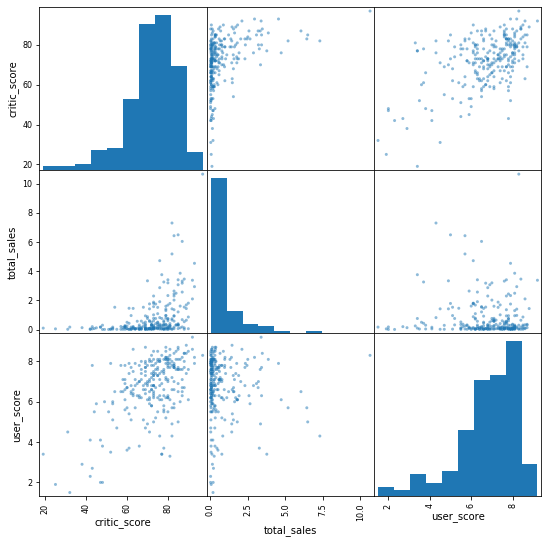

In [31]:
ps4_pivot = ps4.pivot_table(index = ps4.index, values = ['total_sales', 'user_score', 'critic_score'], aggfunc = 'mean')
pd.plotting.scatter_matrix(ps4_pivot, figsize=(9, 9))
display(ps4_pivot.corr())

Как видно из корреляционной таблицы рейтинг пользователей почти не влияет на общие продажи, а вот рейтингов критиков имеет значение.  


Этому можно найти объяснение: изначально мнение об игре создают именно критики, которые далеко не всегда совпадают в оценке с пользователями. 


Для сравнения построим аналогичные таблицы и графики для ещё 3 платформ (PS3, XOne, 3DS).

Корреляция для платформы PS3


,critic_score,total_sales,user_score
critic_score,1.000000,0.336898,0.599920
total_sales,0.336898,1.000000,0.021034
user_score,0.599920,0.021034,1.000000




Корреляция для платформы XOne


,critic_score,total_sales,user_score
critic_score,1.000000,0.410657,0.472462
total_sales,0.410657,1.000000,-0.093737
user_score,0.472462,-0.093737,1.000000




Корреляция для платформы 3DS


,critic_score,total_sales,user_score
critic_score,1.000000,0.337887,0.769536
total_sales,0.337887,1.000000,0.272542
user_score,0.769536,0.272542,1.000000


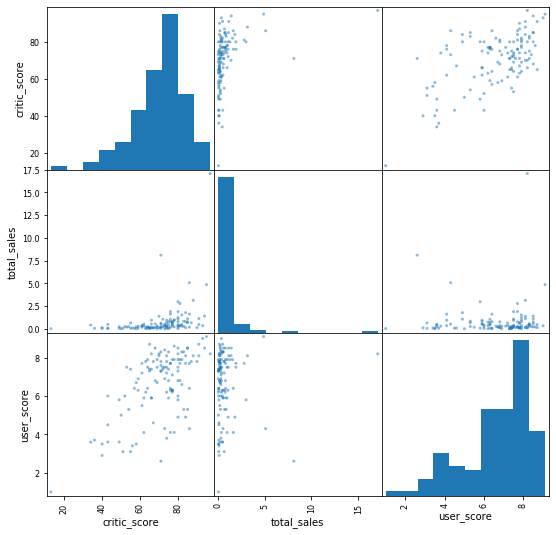

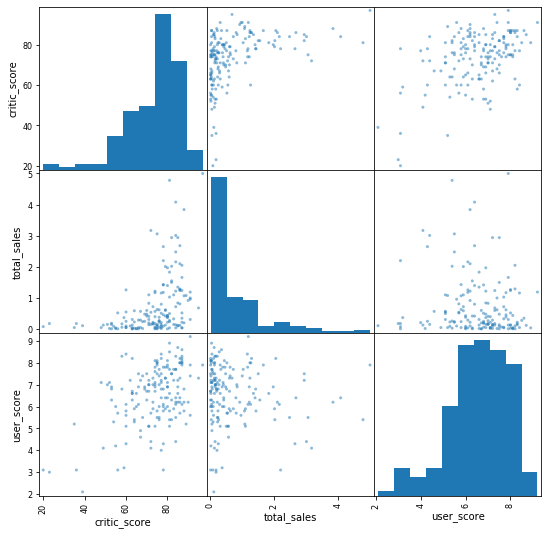

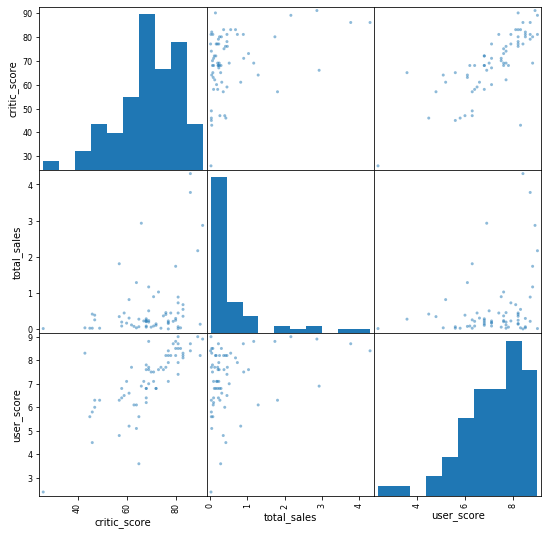

In [32]:
for platform in ['PS3', 'XOne', '3DS']: 
    print('Корреляция для платформы', platform)
    temp = actual_data.query('platform == @platform and (user_score != -1) and (critic_score != -1)')
    temp_pivot = temp.pivot_table(index = temp.index, 
                                  values = ['total_sales', 'user_score', 'critic_score'],
                                  aggfunc = 'mean')
    pd.plotting.scatter_matrix(temp_pivot, figsize=(9, 9))
    display(temp_pivot.corr())
    print()
    print()

Как видно из полученных результатов, ситуация для других платформ повторяется. То есть общий вывод можно сделать такой:  
**Критики имеют среднее влияние на продажи, простые пользователи - не имеют влияния**

### Распределение игр по жанрам <a id="step3.6"></a>   
</div>  

In [33]:
genre_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales.sort_values(by = 'total_sales', ascending=False)

,total_sales
genre,
Action,284.67
Shooter,204.21
Role-Playing,134.41
Sports,131.20
Misc,56.73
Platform,38.51
Racing,35.45
Fighting,31.75
Adventure,21.21


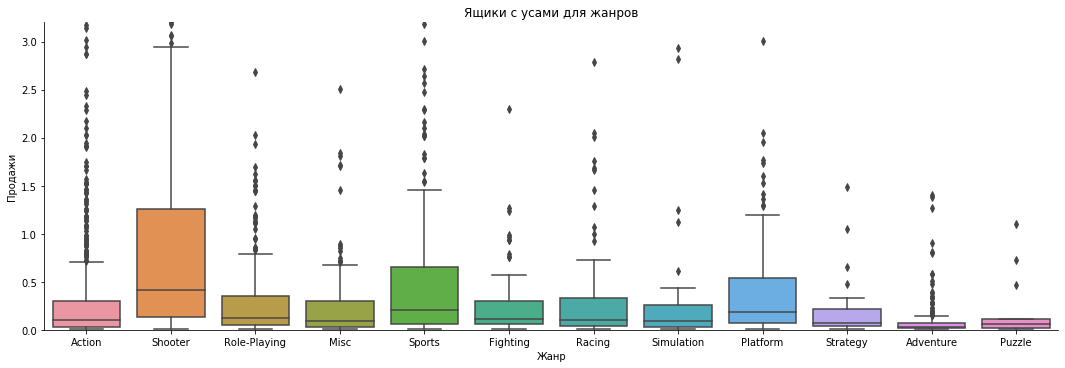

In [34]:
sns.catplot(x="genre", y='total_sales', kind="box", data=actual_data, aspect = 3)
plt.ylim(0,3.2)

plt.title('Ящики с усами для жанров')
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.show()

Из полученных "ящиков" видно следующее:
1. Shooter (шутеры) являются абсолютными лидерами.
2. За ними идут Sports (спортивные игры) и Platform (платформеры).
3. Средний уровень у игр таких жанров, как Action (Экшн), Role-Playing (Ролевые игры), Misс (Неопределенный жанр), Fighting (Файтинги), Racing (Гонки), Simulation (Симуляторы) и Strategy (Стратегии).
4. Наименьшие продажи у Adventure (Головоломки без высокой активности) и Puzzle (Игры-головоломки). У них одни из самых низких абсолютных и средних продаж среди всех жанров.  

Отдельно можно отметить то, что распределение кварталей у всех жанров приблизительно одинаковое.

### Шаг 4. Составление портрета пользователя каждого региона <a id="step4"></a>   
</div>   

### Самые популярные платформы (топ-5) для каждого региона. <a id="step4.1"></a>   
</div>   

Найдём самые популярные платформы (топ-5) каждого региона

In [35]:
#Топ-5 Северной Америки
na_sales = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_sales = na_sales.sort_values(by = 'na_sales', ascending = False)
na_sales.columns = ['sales']
print('Топ-5 платформ Северной Америки')
display(na_sales.head(5))
print()
print()


#Топ-5 Европы
eu_sales = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_sales = eu_sales.sort_values(by = 'eu_sales', ascending = False)
eu_sales.columns = ['sales']
print('Топ-5 платформ Европы')
display(eu_sales.head(5))
print()
print()

#Топ-5 Японии
jp_sales = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_sales = jp_sales.sort_values(by = 'jp_sales', ascending = False)
jp_sales.columns = ['sales']
print('Топ-5 платформ Японии')
display(jp_sales.head(5))



Топ-5 платформ Северной Америки


,sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20




Топ-5 платформ Европы


,sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96




Топ-5 платформ Японии


,sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Как видно из получившихся таблиц, если у Северной Америки и Европы набор платформ одинаковый (при большей популярности платформ Xbox у североамериканцев), то с Японией ситуация отличачется достаточно координально.    


В Японии нет тотального лидерства Playstation 4. Первую же строчку занимает Nintendo 3DS. Плюс в топ-5 присутствует WiiU и PSV, которые успешно перебивают платформы Xbox.


### Самые популярные жанры (топ-5) для каждого региона. <a id="step4.2"></a>   
</div>   

Теперь найдём топ-5 популярных жанров по регионам


Так как только лишь продажи в данном случае посчитать недостаточно, найдём отношение каждого жанра к общему количеству.

In [36]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_data.pivot_table(index='genre', 
                                     values=column, 
                                     aggfunc='sum').sort_values(column, ascending=False)
    region['ratio'] = round(region[column] / region[column].sum(), 3)
    display(region.head(5))

,na_sales,ratio
genre,,
Action,126.05,0.288
Shooter,109.74,0.251
Sports,65.27,0.149
Role-Playing,46.40,0.106
Misc,27.49,0.063


,eu_sales,ratio
genre,,
Action,118.13,0.301
Shooter,87.86,0.224
Sports,60.52,0.154
Role-Playing,36.97,0.094
Racing,20.19,0.051


,jp_sales,ratio
genre,,
Role-Playing,51.04,0.363
Action,40.49,0.288
Misc,9.20,0.065
Fighting,7.65,0.054
Shooter,6.61,0.047


И здесь Япония продолжает выделяться, если запад с большей любовью покупает стрелялки и экшн, то японцы наравне с экшеном даже больше предпочитают РПГ.   

Из интересного, гонки пользуются наибольшей популярностью в Европе (не зря большинство этапов Формулы-1 и других серий проходит именно здесь).

Командые игры не так популярны в Японии, как в Европе и Северной Америке, а вот подраться за приставкой у японцев - это как посидеть за виртуальным рулём у европейцев. 



### Влияние рейтинга ESRB на продажи в каждом регионе <a id="step4.3"></a>   
</div>


In [37]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_data.pivot_table(index='rating', 
                                     values=column, 
                                     aggfunc='sum').sort_values(column, ascending=False)

    region['ratio'] = round(region[column] / region[column].sum(), 3)
    if column == 'na_sales':
        region_na = region.drop(['ratio'],1)
        region_na_ratio = region.drop(['na_sales'],1)
        region_na_ratio.columns = ['na_ratio']
    if column == 'eu_sales':
        region_eu = region.drop(['ratio'],1)
        region_eu_ratio = region.drop(['eu_sales'],1)
        region_eu_ratio.columns = ['eu_ratio']

    if column == 'jp_sales': 
        region_jp = region.drop(['ratio'],1)
        region_jp_ratio = region.drop(['jp_sales'],1)
        region_jp_ratio.columns = ['jp_ratio']

    display(region.head(5))

,na_sales,ratio
rating,,
M,165.21,0.377
RP,89.42,0.204
E,79.05,0.181
E10+,54.24,0.124
T,49.79,0.114


,eu_sales,ratio
rating,,
M,145.32,0.370
E,83.36,0.213
RP,78.91,0.201
E10+,42.69,0.109
T,41.95,0.107


,jp_sales,ratio
rating,,
RP,85.05,0.604
T,20.59,0.146
E,15.14,0.108
M,14.11,0.100
E10+,5.89,0.042


Методом join соединим таблицы для дальнейшего построения графиков. 

In [38]:
all_regions = region_na.join(region_eu).join(region_jp)
all_regions_ratio = region_na_ratio.join(region_eu_ratio).join(region_jp_ratio)
display(all_regions)
display(all_regions_ratio)

,na_sales,eu_sales,jp_sales
rating,,,
M,165.21,145.32,14.11
RP,89.42,78.91,85.05
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
T,49.79,41.95,20.59


,na_ratio,eu_ratio,jp_ratio
rating,,,
M,0.377,0.370,0.100
RP,0.204,0.201,0.604
E,0.181,0.213,0.108
E10+,0.124,0.109,0.042
T,0.114,0.107,0.146


Построим графики с помощью библиотеки seaborn. 

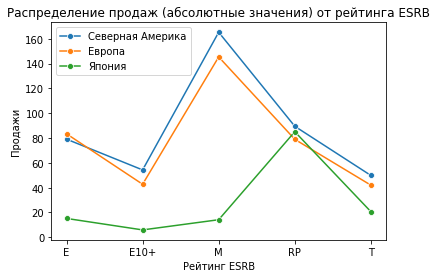

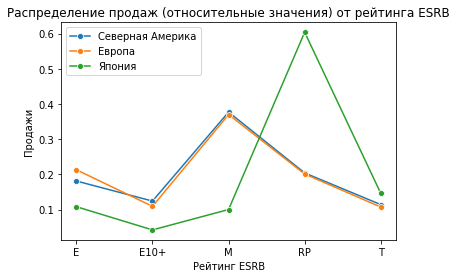

In [39]:
sns.lineplot(data=all_regions['na_sales'], marker='o', label = 'Северная Америка')
sns.lineplot(data=all_regions['eu_sales'], marker='o', label = 'Европа')
sns.lineplot(data=all_regions['jp_sales'], marker='o', label = 'Япония')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.title('Распределение продаж (абсолютные значения) от рейтинга ESRB')
plt.show()

sns.lineplot(data=all_regions_ratio['na_ratio'], marker='o', label = 'Северная Америка')
sns.lineplot(data=all_regions_ratio['eu_ratio'], marker='o', label = 'Европа')
sns.lineplot(data=all_regions_ratio['jp_ratio'], marker='o', label = 'Япония')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.title('Распределение продаж (относительные значения) от рейтинга ESRB')
plt.show()


Мы снова видим разницу между Западом и Востоком.  


Игры для детей старше 17 лет **М** пользуются большей популярностью у пользователей из Европы и Америки, а игры для тинейджеров (13+) **Т** напротив - у японцев (относительные значения).

Игры для всех (**E**) имеют приблизительно одинаковый уровень продаж в Америке и Европе, а их доля в Японии значительно снижена играми без рейтинга (**RP**). При этом сами (**RP**) имеют приблизительно равное количество для каждого из регионов в абсолютных значениях. 

### Шаг 5. Проверка гипотез. <a id="step5"></a>   
</div>

### Проверка гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"<a id="step5.1"></a>   
</div>

Нулевая гипотеза H<sub>0</sub> - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   
Альтернативная гипотеза H<sub>1</sub> - средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [40]:
xone = actual_data.query('platform == "XOne" and user_score >= 0')['user_score']
pc = actual_data.query('platform == "PC" and user_score >= 0')['user_score']
print('Дисперсия для Xbox One:', np.var(xone))
print('Дисперсия для PC:', np.var(pc))
alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия для Xbox One: 1.8965188383045526
Дисперсия для PC: 3.016306347554631
p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Посмотроим сводную таблицу рейтинга для Xbox One и PC

In [41]:
xone_vs_pc = actual_data.query('platform == "XOne" or platform == "PC"')
display(xone_vs_pc.pivot_table(index='platform', values=['user_score','critic_score'], aggfunc='mean'))

,critic_score,user_score
platform,,
PC,59.349206,4.961905
XOne,49.854251,4.542105


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


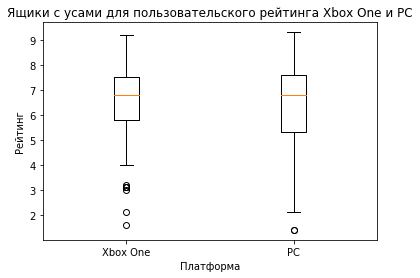

In [42]:
plt.boxplot([actual_data.query('platform == "XOne" and user_score >= 0')['user_score'],
            actual_data.query('platform == "PC" and user_score >= 0')['user_score']],
           labels = ['Xbox One','PC'])
plt.title('Ящики с усами для пользовательского рейтинга Xbox One и PC')
plt.xlabel('Платформа')
plt.ylabel('Рейтинг')   
plt.show()

Как видно из статистического теста и проверки результатов с помощью "ящиков с усами" **гипотезу не получилось опровергнуть**.  <a id="step5.2"></a>   
</div>

### Проверка гипотезы "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" <a id="step5.3"></a>   
</div>

Нулевая гипотеза H<sub>0</sub> - средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза H<sub>1</sub> - средние пользовательские рейтинги жанров Action и Sports разные.

In [43]:
action = actual_data.query('genre == "Action" and user_score >= 0')['user_score']
sports = actual_data.query('genre == "Sports" and user_score >= 0')['user_score']
print('Дисперсия для Xbox One:', np.var(action))
print('Дисперсия для PC:', np.var(sports))
alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия для Xbox One: 1.7648124186332366
Дисперсия для PC: 3.160733984375
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [44]:
action_vs_sports = actual_data.query('genre == "Action" or genre == "Sports"')
display(action_vs_sports.pivot_table(index='genre', values=['user_score','critic_score'], aggfunc='mean'))

,critic_score,user_score
genre,,
Action,28.605744,2.980157
Sports,37.028037,3.664019


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


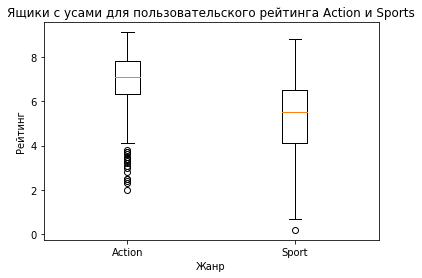

In [45]:
plt.boxplot([actual_data.query('genre == "Action" and user_score >= 0')['user_score'],
            actual_data.query('genre == "Sports" and user_score >= 0')['user_score']],
           labels = ['Action','Sport'])
plt.title('Ящики с усами для пользовательского рейтинга Action и Sports')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')   
plt.show()

<a id="step5.4"></a>   
</div>


Вторая гипотеза **не нашла своего подтверждения**. С высокой вероятностью (около 99%) можно утверждать, что рейтинги игр этих жанров отличаются.

### Шаг 5. Общий вывод  <a id="step6"></a>   
</div>  

Нашему интернет-магазину "Стримчик" мы будем рекомендовать следующее:
1. При работе на Западный рынок игра стоит больше внимания уделять играм на PS (PS4 в особенности) и Xbox.  Для Японии лучше всего реализовать игры для Nintendo 3DS. 
2. В США и Европе наибольшей популярностью пользуются игры жанра Action и Shooter. В Японии кладём на виртуальную полку больше Role-Playing и Action.
3. Западу больше игры для детей старше 17+, а в Японии больше игр 13+.  
4. Не рекомендуем ориентироваться на оценки пользователей.
5. Подсматриваем за оценками критиков (выявлена корреляция их оценок и уровня продаж).
6. Спортивные игры чаще имеют больший рейтинг (и больше продаж), чем экшн-игры.
7. Как и в исследовании на 2017 год, в будущем желательно удалять как можно меньше строчек из датасета.
8. Написать письмо в ESRB c пожеланием тщательнее отмечать игры своим рейтингом. 